In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
trainf = pd.read_csv('Car_features_train.csv')
trainp = pd.read_csv('Car_prices_train.csv')
testf = pd.read_csv('Car_features_test.csv')
testp = pd.read_csv('Car_prices_test.csv')
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


In [7]:
ols_object = smf.ols(formula = 'np.log(price)~(year+engineSize+mileage+mpg)**2+I(mileage**2)', data = train)
model_log= ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1834.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:21:21   Log-Likelihood:                -1173.8
No. Observations:                4960   AIC:                             2372.
Df Residuals:                    4948   BIC:                             2450.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -238.2125     25.790     -9.237      0.000    -288.773    -187.652
year                   0.1227      0.013      9.608      0.000       0.098       0.148
engineSize            13.8349      5.795      2.387      0.017       2.475      25.195
mileage                0.0005      0.000      3.837      0.000       0.000       0.001
mpg                   -1.2446      0.345     -3.610      0.000      -1.921      -0.569
year:engineSize       -0.0067      0.003     -2.324      0.020      -0.012      -0.001
year:mileage        -2.67e-07    6.8e-08     -3.923      0.000      -4e-07   -1.34e-07
year:mpg               0.0006      0.000      3.591      0.000       0.000       0.001
engineSize:mileage -2.668e-07   4.08e-07     -0.654      0.513   -1.07e-06    5.33e-07
engineSize:mpg         0.0028      0.000      6.842      0.000       0.002       0.004
mileage:mpg         7.235e-08   1.79e-08      4.036      0.000    3.72e-08    1.08e-07
I(mileage ** 2)     1.828e-11   5.64e-12      3.240      0.001    7.22e-12    2.93e-11
==============================================================================
Omnibus:                      711.514   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2545.807
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                       6.220   Cond. No.                     1.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

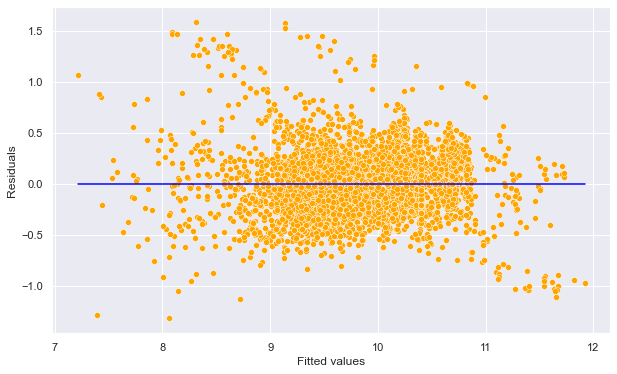

In [8]:
#Plotting residuals vs fitted values
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x = (model_log.fittedvalues), y=(model_log.resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [9]:
out= model_log.outlier_test()

Text(0, 0.5, 'Studentized Residuals')

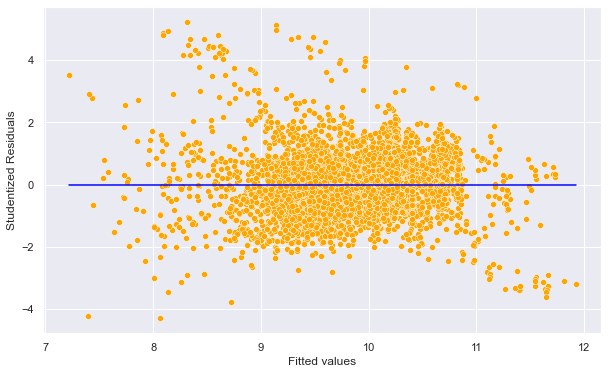

In [10]:
#Plotting studentized residuals vs fitted values
sns.scatterplot(x = (model_log.fittedvalues), y=(out.student_resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')

If student.res > 3 they are outliers

In [11]:
print(np.sum(np.abs(out.student_resid)>3))

86


we have 86 outliers in the data set 
we have an R2 around 0.8 but can it go higher if the outlier are accounted for?